In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [15]:
#2.3.1
df = pd.read_csv("S05-hw-dataset.csv")
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [17]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [18]:
df.value_counts(normalize=True)

client_id  age  income  years_employed  credit_score  debt_to_income  num_credit_cards  num_late_payments  has_mortgage  has_car_loan  savings_balance  checking_balance  region_risk_score  phone_calls_to_support_last_3m  active_loans  customer_tenure_years  default
1          25   94074   22              839           0.547339        1                 7                  0             0             26057             5229             0.080052           19                              1             8                      0          0.000333
2004       43   35470   26              538           0.307111        0                 11                 0             1             7070              4144             0.377450           0                               4             5                      1          0.000333
1995       57   106544  25              602           0.362523        4                 0                  1             0             27045             8240             0.326452

В датасете находится 3000 объектов с 16 (не считая id) признаками. Явных аномалий не наблюдается, все данные находятся в логичных промежутках значений. Распределение таргета имеет умеренную несбалансированность: дефолт имеют 41% пользователей, остальные 59% - нет. 

In [19]:
#2.3.2
X = df.loc[:, df.columns.difference(["client_id", "default"])]
y = df.loc[:, "default"]

In [20]:
print(X.dtypes, end="\n\n")
print("Убедились, что все признаки - числовые", end="\n\n")
min = df.describe().loc["min", "debt_to_income"]
max = df.describe().loc["max", "debt_to_income"]
if min >= 0 and max <= 1:
    print("debt_to_income лежит в корректном диапазоне значений")
else:
    print("debt_to_income не лежит в корректном диапазоне значений")

active_loans                        int64
age                                 int64
checking_balance                    int64
credit_score                        int64
customer_tenure_years               int64
debt_to_income                    float64
has_car_loan                        int64
has_mortgage                        int64
income                              int64
num_credit_cards                    int64
num_late_payments                   int64
phone_calls_to_support_last_3m      int64
region_risk_score                 float64
savings_balance                     int64
years_employed                      int64
dtype: object

Убедились, что все признаки - числовые

debt_to_income лежит в корректном диапазоне значений


In [21]:
#2.3.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [22]:
y_pred_dummy = dummy.predict(X_test)
y_pred_proba_dummy = dummy.predict_proba(X_test)[:, 1]

accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_proba_dummy)

print("Метрики")
print(f"accuracy: {accuracy_dummy}")
print(f"roc_auc: {roc_auc_dummy}")

Метрики
accuracy: 0.59
roc_auc: 0.5


DummyClassifier вместо произведения реального предсказания с обучением на основе исходных данных использует простые правила для опеределения выходов. В нашем случае он пользовался правилом most_frequent, которое под любой вход предсказывает одно и то же значение - самое распространённое значение в исходном векторе таргета. 

Baseline является примитивной моделью, которая используется для сравнения эффективности "умных" моделей. Бывают задачи, для которых простые правила работают так же хорошо, как и сложные модели. Бейзлайны нужны как раз для того, чтобы определить, насколько рационально применение сложной модели в рамкаъ поставленной задачи.

In [23]:
#2.3.4
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42,))
])

parameters = {"logreg__C": [0.01, 0.1, 1.0, 10.0]}

grid_search = GridSearchCV(pipe, parameters)

grid_search.fit(X_train, y_train)

print(f"Лучший параметр C: {grid_search.best_params_['logreg__C']}")

best_model = grid_search.best_estimator_

Лучший параметр C: 0.01


In [24]:
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"accuracy: {accuracy_logreg}")
print(f"roc_auc: {roc_auc_logreg}")

accuracy: 0.8066666666666666
roc_auc: 0.8754191355472876


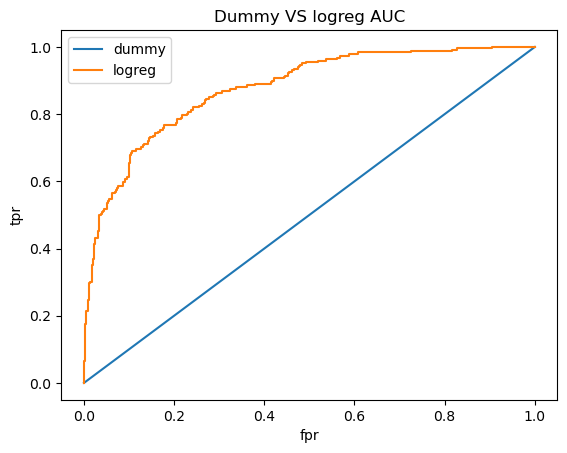

In [29]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
plt.figure()
plt.plot(fpr_dummy, tpr_dummy, label="dummy")
plt.plot(fpr_logreg, tpr_logreg, label="logreg")
plt.title("Dummy VS logreg AUC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.savefig("figures/roc_curves.png")
plt.show()

In [26]:
#2.3.5
comparrison = pd.DataFrame(
    (
        ["Model", "Accuracy", "roc_auc"],
        ["Dummy", accuracy_dummy, roc_auc_dummy],
        ["Logreg", accuracy_logreg, roc_auc_logreg]
    )
)

print(comparrison)

        0         1         2
0   Model  Accuracy   roc_auc
1   Dummy      0.59       0.5
2  Logreg  0.806667  0.875419


Логистическая регрессия прогнозирует вероятность принадлежности наблюдаемого объекта к определённому классу, используя сигмоидную функцию для преобразования значения вероятности в число между 0 и 1. Оптимальный коэффициент для данной модели был подобран с помощью GridSearch. Бейзлайн же просто прогнозирует самый часто наблюдаемый класс в исходном датасете. Бейзлайн является "точкой отсчёта", с которой мы сравниваем другие разрабатываемые нами модели для оценки эффективности и необходимсоти применения сложных моделей. Ознакомимся с сравнительной таблицей выше. Видно, что и показатель точности, и показатель roc_auc у модели, основанной на логистической регрессии, выше на ~0.3, чем у бейзлайна. Несложно сделать вывод, что примитивные правила в нашей задаче справляются хуже, чем обученная логистическая регрессионая модель.  Это означает, что применение модели логистической регрессии для поставленной задачи оправданно и рационально.